In [16]:
!nvidia-smi

Thu Mar 21 07:58:32 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.129.03             Driver Version: 535.129.03   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla P100-PCIE-16GB           Off | 00000000:00:04.0 Off |                    0 |
| N/A   34C    P0              26W / 250W |      0MiB / 16384MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [17]:
!pip install transformers

In [18]:
import torch
import torch.nn as nn
import pandas as pd
import numpy as np
import shutil
import sys

In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the dataset
dataset_path = "/kaggle/input/testingdata/train.csv"
df = pd.read_csv(dataset_path)

In [20]:
df.head(20)

,ID,TITLE,ABSTRACT,Computer Science,Physics,Mathematics,Statistics,Quantitative Biology,Quantitative Finance
0,1,Reconstructing Subject-Specific Effect Maps,Predictive models allow subject-specific inf...,1,0,0,0,0,0
1,2,Rotation Invariance Neural Network,Rotation invariance and translation invarian...,1,0,0,0,0,0
2,3,Spherical polyharmonics and Poisson kernels fo...,We introduce and develop the notion of spher...,0,0,1,0,0,0
3,4,A finite element approximation for the stochas...,The stochastic Landau--Lifshitz--Gilbert (LL...,0,0,1,0,0,0
4,5,Comparative study of Discrete Wavelet Transfor...,Fourier-transform infra-red (FTIR) spectra o...,1,0,0,1,0,0
5,6,On maximizing the fundamental frequency of the...,Let $\Omega \subset \mathbb{R}^n$ be a bound...,0,0,1,0,0,0
6,7,On the rotation period and shape of the hyperb...,We observed the newly discovered hyperbolic ...,0,1,0,0,0,0
7,8,Adverse effects of polymer coating on heat tra...,The ability of metallic nanoparticles to sup...,0,1,0,0,0,0
8,9,SPH calculations of Mars-scale collisions: the...,We model large-scale ($\approx$2000km) impac...,0,1,0,0,0,0
9,10,$\mathcal{R}_{0}$ fails to predict the outbrea...,Time varying susceptibility of host at indiv...,0,0,0,0,1,0


In [21]:
# Split the dataset into train and test sets
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

# Save the train and test datasets to separate CSV files
train_df.to_csv("/kaggle/working/train.csv", index=False)
test_df.to_csv("/kaggle/working/test.csv", index=False)


In [22]:
train_df = pd.read_csv("/kaggle/working/train.csv")
test_df = pd.read_csv("/kaggle/working/test.csv")

In [23]:
train_df['CONTEXT'] = train_df['TITLE'] + ". " + train_df['ABSTRACT']

In [24]:
train_df.head()

,ID,TITLE,ABSTRACT,Computer Science,Physics,Mathematics,Statistics,Quantitative Biology,Quantitative Finance,CONTEXT
0,16467,Reverse Quantum Annealing Approach to Portfoli...,We investigate a hybrid quantum-classical so...,0,0,0,0,0,1,Reverse Quantum Annealing Approach to Portfoli...
1,4022,Arithmetic properties of polynomials,"In this paper, first, we prove that the Diop...",0,0,1,0,0,0,Arithmetic properties of polynomials. In thi...
2,17249,LATTE: Application Oriented Social Network Emb...,"In recent years, many research works propose...",1,0,0,0,0,0,LATTE: Application Oriented Social Network Emb...
3,17240,Full Momentum and Energy Resolved Spectral Fun...,The single-particle spectral function measur...,0,1,0,0,0,0,Full Momentum and Energy Resolved Spectral Fun...
4,2967,Collisional Dynamics of Solitons in the Couple...,We investigate the focusing coupled PT-symme...,0,1,0,0,0,0,Collisional Dynamics of Solitons in the Couple...


In [25]:
test_df['CONTEXT'] = test_df['TITLE'] + ". " + test_df['ABSTRACT']

In [26]:
test_df.drop(labels=['TITLE', 'ABSTRACT', 'ID'], axis=1, inplace=True)

In [27]:
test_df.head()

,Computer Science,Physics,Mathematics,Statistics,Quantitative Biology,Quantitative Finance,CONTEXT
0,1,0,0,0,0,0,Dynamic Layer Normalization for Adaptive Neura...
1,0,0,1,1,0,0,Susceptibility Propagation by Using Diagonal C...
2,1,0,1,0,0,0,The Robot Routing Problem for Collecting Aggre...
3,0,1,0,1,0,0,"Probability, Statistics and Planet Earth, I: G..."
4,1,0,0,0,0,0,Counting the number of metastable states in th...


In [28]:

# dropping useless features/columns
train_df.drop(labels=['TITLE', 'ABSTRACT', 'ID'], axis=1, inplace=True)
     

In [29]:
train_df.columns

Index(['Computer Science', 'Physics', 'Mathematics', 'Statistics',
       'Quantitative Biology', 'Quantitative Finance', 'CONTEXT'],
      dtype='object')

In [30]:
train_df = train_df[['CONTEXT', 'Computer Science', 'Physics', 'Mathematics', 'Statistics',
                     'Quantitative Biology', 'Quantitative Finance',]]

In [31]:
train_df.columns

Index(['CONTEXT', 'Computer Science', 'Physics', 'Mathematics', 'Statistics',
       'Quantitative Biology', 'Quantitative Finance'],
      dtype='object')

In [32]:
train_df.head()

,CONTEXT,Computer Science,Physics,Mathematics,Statistics,Quantitative Biology,Quantitative Finance
0,Reverse Quantum Annealing Approach to Portfoli...,0,0,0,0,0,1
1,Arithmetic properties of polynomials. In thi...,0,0,1,0,0,0
2,LATTE: Application Oriented Social Network Emb...,1,0,0,0,0,0
3,Full Momentum and Energy Resolved Spectral Fun...,0,1,0,0,0,0
4,Collisional Dynamics of Solitons in the Couple...,0,1,0,0,0,0


<Axes: >

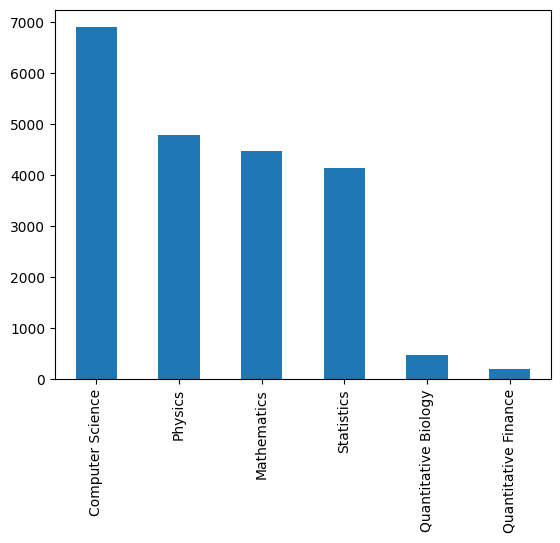

In [33]:

target_list = ['Computer Science', 'Physics', 'Mathematics', 'Statistics',
       'Quantitative Biology', 'Quantitative Finance']
train_df[target_list].sum().plot.bar()

In [34]:
# hyperparameters
MAX_LEN = 256
TRAIN_BATCH_SIZE = 32
VALID_BATCH_SIZE = 32
EPOCHS = 2
LEARNING_RATE = 1e-05

In [35]:
from transformers import BertTokenizer, BertModel

In [36]:
tokenizer = BertTokenizer.from_pretrained('google-bert/bert-base-uncased')

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

In [37]:
class CustomDataset(torch.utils.data.Dataset):

    def __init__(self, df, tokenizer, max_len):
        self.tokenizer = tokenizer
        self.df = df
        self.title = df['CONTEXT']
        self.targets = self.df[target_list].values
        self.max_len = max_len

    def __len__(self):
        return len(self.title)

    def __getitem__(self, index):
        title = str(self.title[index])
        title = " ".join(title.split())

        inputs = self.tokenizer.encode_plus(
            title,
            None,
            add_special_tokens=True,
            max_length=self.max_len,
            padding='max_length',
            return_token_type_ids=True,
            truncation=True,
            return_attention_mask=True,
            return_tensors='pt'
        )

        return {
            'input_ids': inputs['input_ids'].flatten(),
            'attention_mask': inputs['attention_mask'].flatten(),
            'token_type_ids': inputs["token_type_ids"].flatten(),
            'targets': torch.FloatTensor(self.targets[index])
        }

In [38]:
train_size = 0.8
train_df2 = train_df.sample(frac=train_size, random_state=200).reset_index(drop=True)
val_df = train_df.drop(train_df2.index).reset_index(drop=True)
train_df = train_df.drop(train_df2.index).reset_index(drop=True)

In [39]:
train_dataset = CustomDataset(train_df, tokenizer, MAX_LEN)
valid_dataset = CustomDataset(val_df, tokenizer, MAX_LEN)
test_dataset = CustomDataset(test_df, tokenizer, MAX_LEN)

In [40]:
train_data_loader = torch.utils.data.DataLoader(train_dataset,
    batch_size=TRAIN_BATCH_SIZE,
    shuffle=True,
    num_workers=0
)

val_data_loader = torch.utils.data.DataLoader(valid_dataset,
    batch_size=VALID_BATCH_SIZE,
    shuffle=False,
    num_workers=0
)

test_data_loader = torch.utils.data.DataLoader(test_dataset,
    batch_size=VALID_BATCH_SIZE,
    shuffle=False,
    num_workers=0
)

In [41]:
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

In [42]:
device

device(type='cuda')

In [43]:
def load_ckp(checkpoint_fpath, model, optimizer):
    """
    checkpoint_path: path to save checkpoint
    model: model that we want to load checkpoint parameters into
    optimizer: optimizer we defined in previous training
    """
    # load check point
    checkpoint = torch.load(checkpoint_fpath)
    # initialize state_dict from checkpoint to model
    model.load_state_dict(checkpoint['state_dict'])
    # initialize optimizer from checkpoint to optimizer
    optimizer.load_state_dict(checkpoint['optimizer'])
    # initialize valid_loss_min from checkpoint to valid_loss_min
    valid_loss_min = checkpoint['valid_loss_min']
    # return model, optimizer, epoch value, min validation loss
    return model, optimizer, checkpoint['epoch'], valid_loss_min.item()

def save_ckp(state, is_best, checkpoint_path, best_model_path):
    """
    state: checkpoint we want to save
    is_best: is this the best checkpoint; min validation loss
    checkpoint_path: path to save checkpoint
    best_model_path: path to save best model
    """
    f_path = checkpoint_path
    # save checkpoint data to the path given, checkpoint_path
    torch.save(state, f_path)
    # if it is a best model, min validation loss
    if is_best:
        best_fpath = best_model_path
        # copy that checkpoint file to best path given, best_model_path
        shutil.copyfile(f_path, best_fpath)

In [44]:
class BERTClass(torch.nn.Module):
    def __init__(self):
        super(BERTClass, self).__init__()
        self.bert_model = BertModel.from_pretrained('google-bert/bert-base-uncased', return_dict=True)
        self.dropout = torch.nn.Dropout(0.3)
        self.linear = torch.nn.Linear(768, 6)

    def forward(self, input_ids, attn_mask, token_type_ids):
        output = self.bert_model(
            input_ids,
            attention_mask=attn_mask,
            token_type_ids=token_type_ids
        )
        output_dropout = self.dropout(output.pooler_output)
        output = self.linear(output_dropout)
        return output

model = BERTClass()
model.to(device)

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

BERTClass(
  (bert_model): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_a

In [45]:
def loss_fn(outputs, targets):
    return torch.nn.BCEWithLogitsLoss()(outputs, targets)

optimizer = torch.optim.Adam(params =  model.parameters(), lr=LEARNING_RATE)

In [46]:
val_targets=[]
val_outputs=[]

In [47]:
!pip install torchmetrics

In [59]:
def train_model(n_epochs, training_loader, validation_loader, model,
                optimizer, checkpoint_path, best_model_path):

  # initialize tracker for minimum validation loss
  valid_loss_min = np.Inf


  for epoch in range(1, n_epochs+1):
    train_loss = 0
    valid_loss = 0

    model.train()
    print('############# Epoch {}: Training Start   #############'.format(epoch))
    for batch_idx, data in enumerate(training_loader):
        print('yyy epoch', batch_idx)
        ids = data['input_ids'].to(device, dtype = torch.long)
        mask = data['attention_mask'].to(device, dtype = torch.long)
        token_type_ids = data['token_type_ids'].to(device, dtype = torch.long)
        targets = data['targets'].to(device, dtype = torch.float)

        outputs = model(ids, mask, token_type_ids)

        optimizer.zero_grad()
        loss = loss_fn(outputs, targets)
        if batch_idx%5000==0:
          print(f'Epoch: {epoch}, Training Loss:  {loss.item()}')

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        #print('before loss data in training', loss.item(), train_loss)
        train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.item() - train_loss))
        #print('after loss data in training', loss.item(), train_loss)

    print('############# Epoch {}: Training End     #############'.format(epoch))

    print('############# Epoch {}: Validation Start   #############'.format(epoch))
    ######################
    # validate the model #
    ######################

    model.eval()

    with torch.no_grad():
      for batch_idx, data in enumerate(validation_loader, 0):
            ids = data['input_ids'].to(device, dtype = torch.long)
            mask = data['attention_mask'].to(device, dtype = torch.long)
            token_type_ids = data['token_type_ids'].to(device, dtype = torch.long)
            targets = data['targets'].to(device, dtype = torch.float)
            outputs = model(ids, mask, token_type_ids)

            loss = loss_fn(outputs, targets)
            valid_loss = valid_loss + ((1 / (batch_idx + 1)) * (loss.item() - valid_loss))
            val_targets.extend(targets.cpu().detach().numpy().tolist())
            val_outputs.extend(torch.sigmoid(outputs).cpu().detach().numpy().tolist())

      print('############# Epoch {}: Validation End     #############'.format(epoch))
      # calculate average losses
      print('before cal avg train loss', train_loss)
      train_loss = train_loss/len(training_loader)
      valid_loss = valid_loss/len(validation_loader)
      # print training/validation statistics
      print('Epoch: {} \tAvgerage Training Loss: {:.6f} \tAverage Validation Loss: {:.6f}'.format(
            epoch,
            train_loss,
            valid_loss
            ))

      # create checkpoint variable and add important data
      checkpoint = {
            'epoch': epoch + 1,
            'valid_loss_min': valid_loss,
            'state_dict': model.state_dict(),
            'optimizer': optimizer.state_dict()
      }

        # save checkpoint
      save_ckp(checkpoint, False, checkpoint_path, best_model_path)

      ## TODO: save the model if validation loss has decreased
      if valid_loss <= valid_loss_min:
        print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(valid_loss_min,valid_loss))
        # save checkpoint as best model
        save_ckp(checkpoint, True, checkpoint_path, best_model_path)
        valid_loss_min = valid_loss

    print('############# Epoch {}  Done   #############\n'.format(epoch))

  return model

In [49]:
ckpt_path = "/kaggle/working/checkpoint122" 
best_model_path = "/kaggle/working/BERT122.pt"

In [60]:
trained_model = train_model(EPOCHS, train_data_loader, val_data_loader, model, optimizer, ckpt_path, best_model_path)

############# Epoch 1: Training Start   #############
yyy epoch 0
Epoch: 1, Training Loss:  0.2961270213127136
yyy epoch 1
yyy epoch 2
yyy epoch 3
yyy epoch 4
yyy epoch 5
yyy epoch 6
yyy epoch 7
yyy epoch 8
yyy epoch 9
yyy epoch 10
yyy epoch 11
yyy epoch 12
yyy epoch 13
yyy epoch 14
yyy epoch 15
yyy epoch 16
yyy epoch 17
yyy epoch 18
yyy epoch 19
yyy epoch 20
yyy epoch 21
yyy epoch 22
yyy epoch 23
yyy epoch 24
yyy epoch 25
yyy epoch 26
yyy epoch 27
yyy epoch 28
yyy epoch 29
yyy epoch 30
yyy epoch 31
yyy epoch 32
yyy epoch 33
yyy epoch 34
yyy epoch 35
yyy epoch 36
yyy epoch 37
yyy epoch 38
yyy epoch 39
yyy epoch 40
yyy epoch 41
yyy epoch 42
yyy epoch 43
yyy epoch 44
yyy epoch 45
yyy epoch 46
yyy epoch 47
yyy epoch 48
yyy epoch 49
yyy epoch 50
yyy epoch 51
yyy epoch 52
yyy epoch 53
yyy epoch 54
yyy epoch 55
yyy epoch 56
yyy epoch 57
yyy epoch 58
yyy epoch 59
yyy epoch 60
yyy epoch 61
yyy epoch 62
yyy epoch 63
yyy epoch 64
yyy epoch 65
yyy epoch 66
yyy epoch 67
yyy epoch 68
yyy epoch 69
y

In [51]:
from sklearn.metrics import accuracy_score, f1_score

def evaluate_model(model, test_loader, average='micro'):
    model.eval()
    all_predictions = []
    all_targets = []

    with torch.no_grad():
        for data in test_loader:
            ids = data['input_ids'].to(device, dtype=torch.long)
            mask = data['attention_mask'].to(device, dtype=torch.long)
            token_type_ids = data['token_type_ids'].to(device, dtype=torch.long)
            targets = data['targets'].to(device, dtype=torch.float)
            outputs = model(ids, mask, token_type_ids)

            predictions = torch.round(torch.sigmoid(outputs)).cpu().detach().numpy()
            all_predictions.extend(predictions)
            all_targets.extend(targets.cpu().detach().numpy())

    accuracy = accuracy_score(all_targets, all_predictions)

    print(f'Accuracy: {accuracy:.4f}')

# Load the best model checkpoint
def load_checkpoint(filepath, model, optimizer):
    checkpoint = torch.load(filepath)
    model.load_state_dict(checkpoint['state_dict'])
    optimizer.load_state_dict(checkpoint['optimizer'])
    return model

# Assuming you have defined your test_loader
# test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Load the best model checkpoint
model = load_checkpoint(best_model_path, model, optimizer)

# Evaluate the model on the test set
evaluate_model(model, test_data_loader, average='micro')

Accuracy: 0.6041


In [58]:
import numpy as np
import torch

# Assuming tokenizer and model are initialized elsewhere in your code
# MAX_LEN is also assumed to be defined

example ='Equality of the usual definitions of Brakke flow In 1978 Brakke introduced the mean curvature flow in the setting of geometric measure theory. There exist multiple variants of the original definition. Herewe prove that most of them are indeed equal. One central point is to correctthe proof of Brakkes, where he develops an estimate for the evolution of the measure of time-dependent test functions.'

print(example)
target_list = ['Computer Science', 'Physics', 'Mathematics', 'Statistics','Quantitative Biology', 'Quantitative Finance']
print(target_list)

encodings = tokenizer.encode_plus(
    example,
    None,
    add_special_tokens=True,
    max_length=MAX_LEN,
    padding='max_length',
    return_token_type_ids=True,
    truncation=True,
    return_attention_mask=True,
    return_tensors='pt'
)

model.eval()
with torch.no_grad():
    input_ids = encodings['input_ids'].to(device, dtype=torch.long)
    attention_mask = encodings['attention_mask'].to(device, dtype=torch.long)
    token_type_ids = encodings['token_type_ids'].to(device, dtype=torch.long)
    output = model(input_ids, attention_mask, token_type_ids)
    final_output = torch.sigmoid(output).cpu().detach().numpy().tolist()
    print(final_output)

    # Extract top 3 sentiments
    sorted_indices = np.argsort(final_output, axis=1)[:, ::-1]  # Sort indices in descending order
    top_3_indices = sorted_indices[:, :3]  # Extract top 3 indices
    top_3_sentiments = [[target_list[i] for i in indices] for indices in top_3_indices]
    print(top_3_sentiments)

Equality of the usual definitions of Brakke flow In 1978 Brakke introduced the mean curvature flow in the setting of geometric measure theory. There exist multiple variants of the original definition. Herewe prove that most of them are indeed equal. One central point is to correctthe proof of Brakkes, where he develops an estimate for the evolution of the measure of time-dependent test functions.
['Computer Science', 'Physics', 'Mathematics', 'Statistics', 'Quantitative Biology', 'Quantitative Finance']
[[0.13121458888053894, 0.1474028080701828, 0.843743622303009, 0.12953771650791168, 0.07423913478851318, 0.07307450473308563]]
[['Mathematics', 'Physics', 'Computer Science']]


In [53]:
df.head(140)

,ID,TITLE,ABSTRACT,Computer Science,Physics,Mathematics,Statistics,Quantitative Biology,Quantitative Finance
0,1,Reconstructing Subject-Specific Effect Maps,Predictive models allow subject-specific inf...,1,0,0,0,0,0
1,2,Rotation Invariance Neural Network,Rotation invariance and translation invarian...,1,0,0,0,0,0
2,3,Spherical polyharmonics and Poisson kernels fo...,We introduce and develop the notion of spher...,0,0,1,0,0,0
3,4,A finite element approximation for the stochas...,The stochastic Landau--Lifshitz--Gilbert (LL...,0,0,1,0,0,0
4,5,Comparative study of Discrete Wavelet Transfor...,Fourier-transform infra-red (FTIR) spectra o...,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...
135,136,Behaviour of electron content in the ionospher...,One of the most important parameters in iono...,0,1,0,0,0,0
136,137,Fractional compound Poisson processes with mul...,For the particles undergoing the anomalous d...,0,0,1,1,0,0
137,138,Zero-point spin-fluctuations of single adatoms,Stabilizing the magnetic signal of single ad...,0,1,0,0,0,0
138,139,Exploration-exploitation tradeoffs dictate the...,We study a minimal model for the growth of a...,0,0,0,0,1,0


In [ ]:
# import os

# # Specify the file path
# file_path = "/kaggle/working/train.csv"

# # Check if the file exists before attempting to remove it
# if os.path.exists(file_path):
#     os.remove(file_path)
#     print("File removed successfully.")
# else:
#     print("The file does not exist.")


In [ ]:
%cd /kaggle/working
from IPython.display import FileLink
​df = pd.DataFrame(df_train_default)
csv_file = '/kaggle/working/BERT122.pt'
df.to_csv(csv_file, index=False)
print("CSV file 'df_train_default' exported successfully.")
FileLink(csv_file